## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_id = duplicate_df["Mouse ID"].unique().tolist()
print(duplicate_id)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
for id in duplicate_id:
    dup_index = merge_df[merge_df["Mouse ID"] == id].index
dup_df = merge_df.iloc[dup_index,:]
print(dup_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(dup_index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().to_frame().rename(columns={"Tumor Volume (mm3)":"Mean"})
tumor_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().to_frame().rename(columns={"Tumor Volume (mm3)":"Median"})
tumor_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().to_frame().rename(columns={"Tumor Volume (mm3)":"Variance"})
tumor_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().to_frame().rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
tumor_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().to_frame().rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_df = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem], axis=1)

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

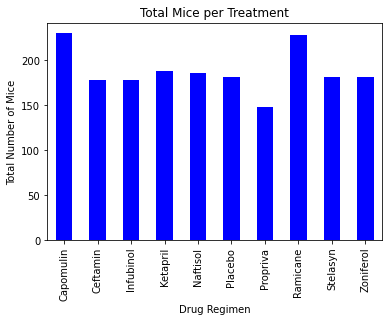

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_data = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

mouse_data.plot(kind="bar", facecolor="blue")
plt.title("Total Mice per Treatment")
plt.ylabel("Total Number of Mice")
plt.xlabel("Drug Regimen")


Text(0, 0.5, 'Total Number of Mice')

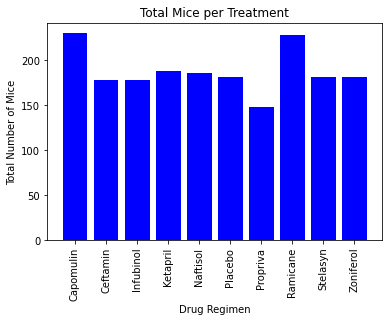

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = mouse_data.to_frame().reset_index()
x_axis = np.arange(len(mouse_data))

plt.bar(x_axis, mouse_data, color="b",align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs["Drug Regimen"], rotation="vertical")
plt.title("Total Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")


In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = clean_df.groupby("Sex")["Mouse ID"].nunique()
mouse_gender


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

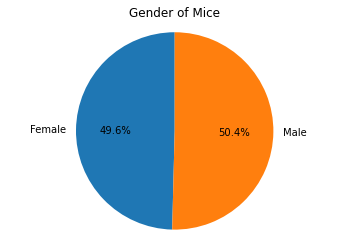

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = mouse_gender.to_frame().reset_index()

plt.title("Gender of Mice")
plt.pie(mouse_gender, labels=genders["Sex"], autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
